In [1]:
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data/Xeek_train_subset_clean.csv')

In [3]:
df.describe()

,DEPTH_MD,CALI,RDEP,RHOB,GR,NPHI,PEF,DTC
count,133198.000000,133006.000000,125805.000000,108053.000000,133198.000000,91725.000000,100840.000000,132635.000000
mean,1792.944663,13.199399,1.743774,2.199556,69.553872,0.355602,4.511845,122.700286
std,739.441515,3.561386,13.233330,0.236902,39.328728,0.143857,5.092807,34.234879
min,415.261599,5.946157,0.123068,1.366913,0.109284,-0.023143,1.010027,7.415132
25%,1182.822400,11.381848,0.777323,2.029237,43.244637,0.234927,2.857540,87.899776
50%,1747.524495,12.698571,1.130621,2.162121,66.266132,0.382014,3.780121,135.968094
75%,2413.874901,14.944049,1.644573,2.404375,93.808681,0.480985,5.098502,147.388626
max,3272.024000,25.717396,1856.935059,3.115611,804.298950,0.817310,365.575592,230.432953


In [4]:
df = df.dropna()

In [5]:
# Select inputs and target
X = df[['RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC']]
y = df['LITH']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
scaler = StandardScaler()

#Fit the StandardScaler to the training data
X_train = scaler.fit_transform(X_train)

# Apply the StandardScaler, but not fit, to the validation data
X_test = scaler.transform(X_test)

In [8]:
clf = KNeighborsClassifier()

In [9]:
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
y_pred = clf.predict(X_test)

In [11]:
accuracy_score(y_test, y_pred)

0.8918532439941167

In [12]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

      Anhydrite       0.91      0.78      0.84        27
          Chalk       0.74      0.78      0.76       632
           Coal       0.91      0.56      0.69        18
       Dolomite       0.55      0.48      0.52        33
         Halite       0.86      0.75      0.80         8
      Limestone       0.87      0.84      0.86      3345
           Marl       0.79      0.76      0.77      1109
      Sandstone       0.84      0.84      0.84      2971
Sandstone/Shale       0.70      0.60      0.65      1404
          Shale       0.94      0.97      0.95     14626
           Tuff       0.67      0.51      0.58       303

       accuracy                           0.89     24476
      macro avg       0.80      0.72      0.75     24476
   weighted avg       0.89      0.89      0.89     24476



In [14]:
test_data = X_test.copy()
# test_data['ACT_LITH'] = y_test

In [15]:
test_data['PRED_LITH'] = clf.predict(X_test)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [33]:
test_data

,RDEP,RHOB,GR,NPHI,PEF,DTC,ACT_LITH,PRED_LITH
29684,1.193440,2.182105,51.944595,0.410438,3.686380,105.538712,Tuff,Sandstone
78639,1.289655,2.558180,77.946213,0.266859,4.798450,81.703087,Shale,Shale
132604,2.125775,2.509588,44.565399,0.252445,4.534646,62.461937,Shale,Limestone
8150,0.787157,2.145696,42.247433,0.521984,4.906898,116.978127,Sandstone,Sandstone
50131,2.850487,2.393504,14.657847,0.131891,5.153796,85.103271,Limestone,Limestone
...,...,...,...,...,...,...,...,...
69633,0.381389,2.000316,61.417370,0.537778,11.603960,149.229874,Shale,Shale
95906,1.236192,2.544152,93.025795,0.318883,7.197109,94.410767,Shale,Shale
23354,1.281011,1.867275,74.915291,0.527634,1.888595,148.716858,Shale,Shale
78590,0.770204,2.459796,61.594414,0.241118,4.593880,83.205498,Sandstone/Shale,Sandstone/Shale


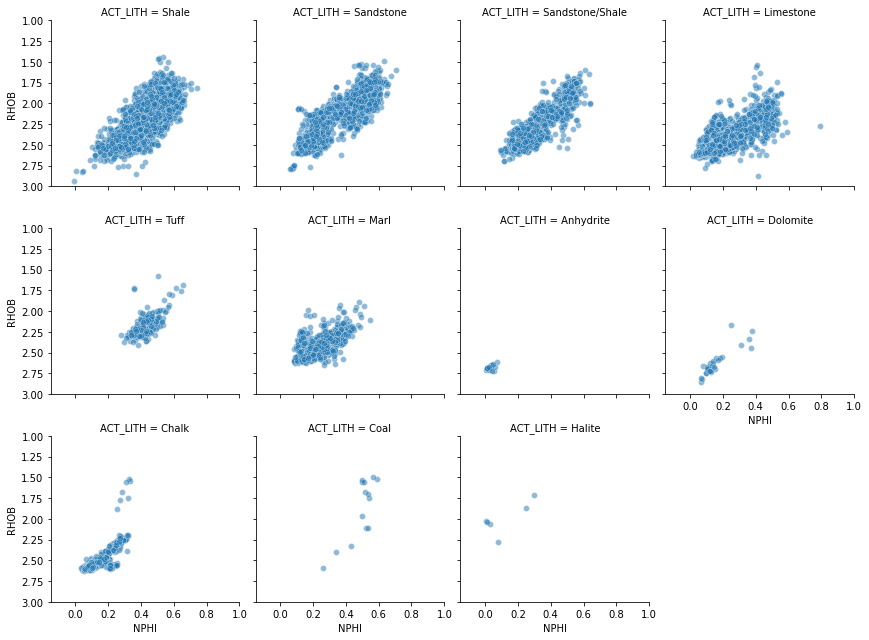

In [39]:
g = sns.FacetGrid(test_data, col='ACT_LITH', col_wrap=4, 
                  col_order= ['Shale', 'Sandstone', 
                              'Sandstone/Shale', 
                              'Limestone', 'Tuff', 
                              'Marl', 'Anhydrite', 
                              'Dolomite', 'Chalk',
                              'Coal', 'Halite'])
g.map(sns.scatterplot, 'NPHI', 'RHOB', alpha=0.5)
g.set(xlim=(-0.15, 1))
g.set(ylim=(3, 1))

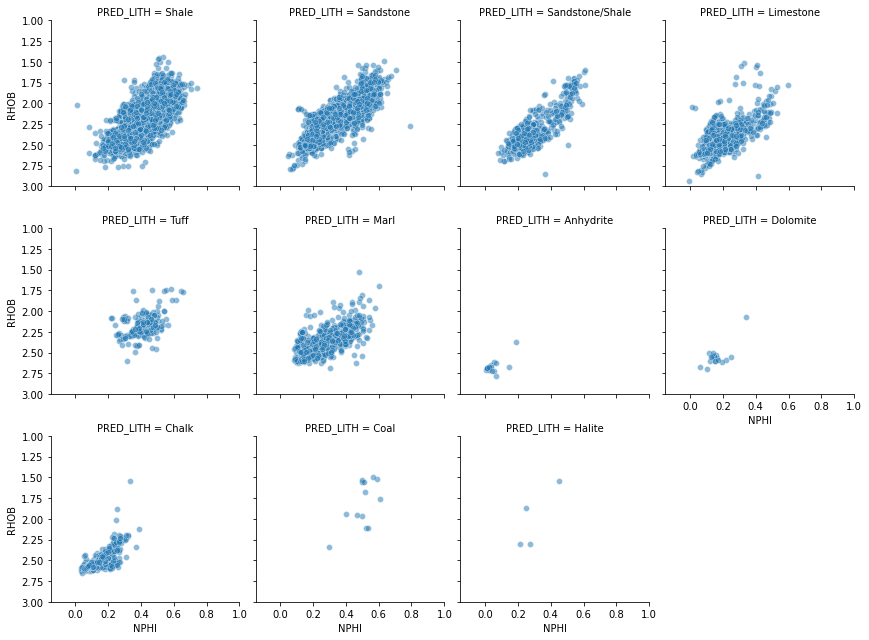

In [38]:
g = sns.FacetGrid(test_data, col='PRED_LITH', col_wrap=4, 
                 col_order= ['Shale', 'Sandstone', 
                              'Sandstone/Shale', 
                              'Limestone', 'Tuff', 
                              'Marl', 'Anhydrite', 
                              'Dolomite', 'Chalk',
                              'Coal', 'Halite'])
g.map(sns.scatterplot, 'NPHI', 'RHOB', alpha=0.5)
g.set(xlim=(-0.15, 1))
g.set(ylim=(3, 1))

[[   14     1     0     1     0     0     0     2     0     0     0]
 [    0   449     0     0     0   195     4    16     8     0     0]
 [    0     0     9     0     0     0     2     3     0     0     0]
 [    0     0     0     2     0    12     0    11     1     3     0]
 [    0     0     0     0     1     2     0     0     0     3     0]
 [    3   185     0     5     0  2613   135   118    47   197     8]
 [    0    22     0     0     0   215   610    52    36   192    12]
 [    2    41     2     8     1   166    71  2144   155   413    37]
 [    0    20     1     2     0    60    52   235   619   358     6]
 [    0     1     1     0     2    74   157   340   215 13734    59]
 [    0     0     0     0     0     4    19    49     3   160    76]]


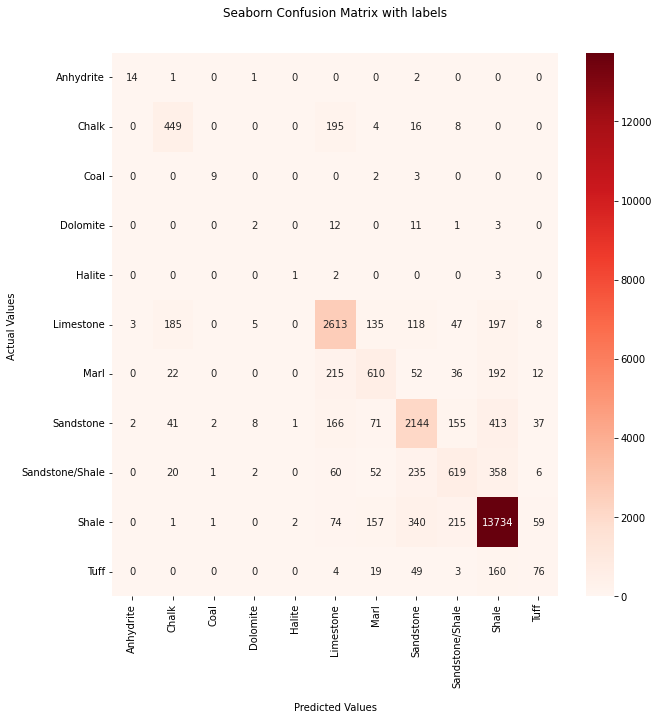

In [27]:
# Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

labels = ['Shale', 'Sandstone', 'Sandstone/Shale', 'Limestone', 'Tuff',
       'Marl', 'Anhydrite', 'Dolomite', 'Chalk', 'Coal', 'Halite']
labels.sort()

fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Reds', fmt='.0f',
                xticklabels=labels, 
                yticklabels = labels)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

